In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv
/kaggle/input/students-grading-dataset/metadata.xlsx
/kaggle/input/students-grading-dataset/Students_Grading_Dataset.json


## **Introduction**

Today's project is applying the machine learning pipeline on a students' dataset to examine trends and predict performance.

**Problem:** Student academic success is a priority for educational institutions, yet identifying factors that influence performance such as attendance, study habits, or socio-economic background, remains challenging. It is, therefore, important to predict student outcomes (e.g., grades) to enable to form targeted interventions, personalized support, and improved teaching strategies. Manual analysis of student data alone is inefficient therebyy making machine learning an ideal solution to uncover patterns and predict performance.

**Objective:** We will aim to analyze this student performance dataset and build a machine learning model to predict final grades (Grade) based on features like attendance, midterm scores, study hours, and more. We will in the process explore relationships, preprocess the data, and evaluating models, enabling us to provide actionable insights and a predictive tool.

Here are the steps we will follow in the process:
1. Preprocess the data to handle missing values and select relevant features.
2. Conduct Exploratory Data Analysis (EDA) to understand feature distributions and their impact on Grade.
3. Further preprocess (encode categorical features, scale numerical ones).
4. Train classification models (e.g., Logistic Regression, Random Forest, XGBoost) to predict Grade.
5. Evaluate models with accuracy, precision, recall, and F1-score, addressing potential class imbalance.
6. Visualize results and interpret findings for educational use.

## Step 1. Import Libraries

In this section, we will import the libraries that we will use for this process.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

## Step 2. Loading and Cleaning Data

In [2]:
# load the data
df = pd.read_csv('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [3]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [4]:
# check shape
df.shape

(5000, 23)

In [5]:
# null values
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [6]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


## Step 3. Initial Preprocessing

I have decided to handle missing values before going into EDA since the missing values in Attendance (%) (516), Assignments_Avg (517), and Parent_Education_Level (1,794) can distort EDA and modeling. I did not want to createe visualizations that do not contain the full set of data. Our initial preprocessing steps include:
1. Drop identifier columns (Student_ID, First_Name, Last_Name, Email) irrelevant to prediction.
2. Impute numerical features (Attendance (%), Assignments_Avg) with median (robust to outliers).
3. Impute categorical feature (Parent_Education_Level) with mode (most frequent value).

In [8]:
# Drop identifier columns
drop_cols = ['Student_ID', 'First_Name', 'Last_Name', 'Email']
df_clean = df.drop(columns=drop_cols)
print("Shape after dropping columns:", df_clean.shape)

Shape after dropping columns: (5000, 19)


In [9]:
# Define columns for imputation
numerical_cols = ['Attendance (%)', 'Assignments_Avg']
categorical_cols = ['Parent_Education_Level']

# Impute missing values
# Numerical: Median imputation
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical: Mode imputation
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [10]:
# Check remaining missing values
print("\nMissing Values After Imputation:")
print(df_clean.isnull().sum())


Missing Values After Imputation:
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


## Step 4. EDA

Now that we have a no missing values, we can safely create visualizations. We do this to reveal feature distributions, relationships with Grade, and potential class balance issues. It is important to understand such relationships because this informs the final preprocessing step (e.g., encoding, scaling) and model selection. We will achieve this by:
1. Visualizing distributions of key numerical features (Attendance (%), Midterm_Score, Final_Score, Total_Score, Study_Hours_per_Week).
2. Exploring Grade distribution to assess class balance.
3. Analyzing relationships between numerical features and Grade using box plots.
4. Checking categorical feature distributions (Gender, Department).

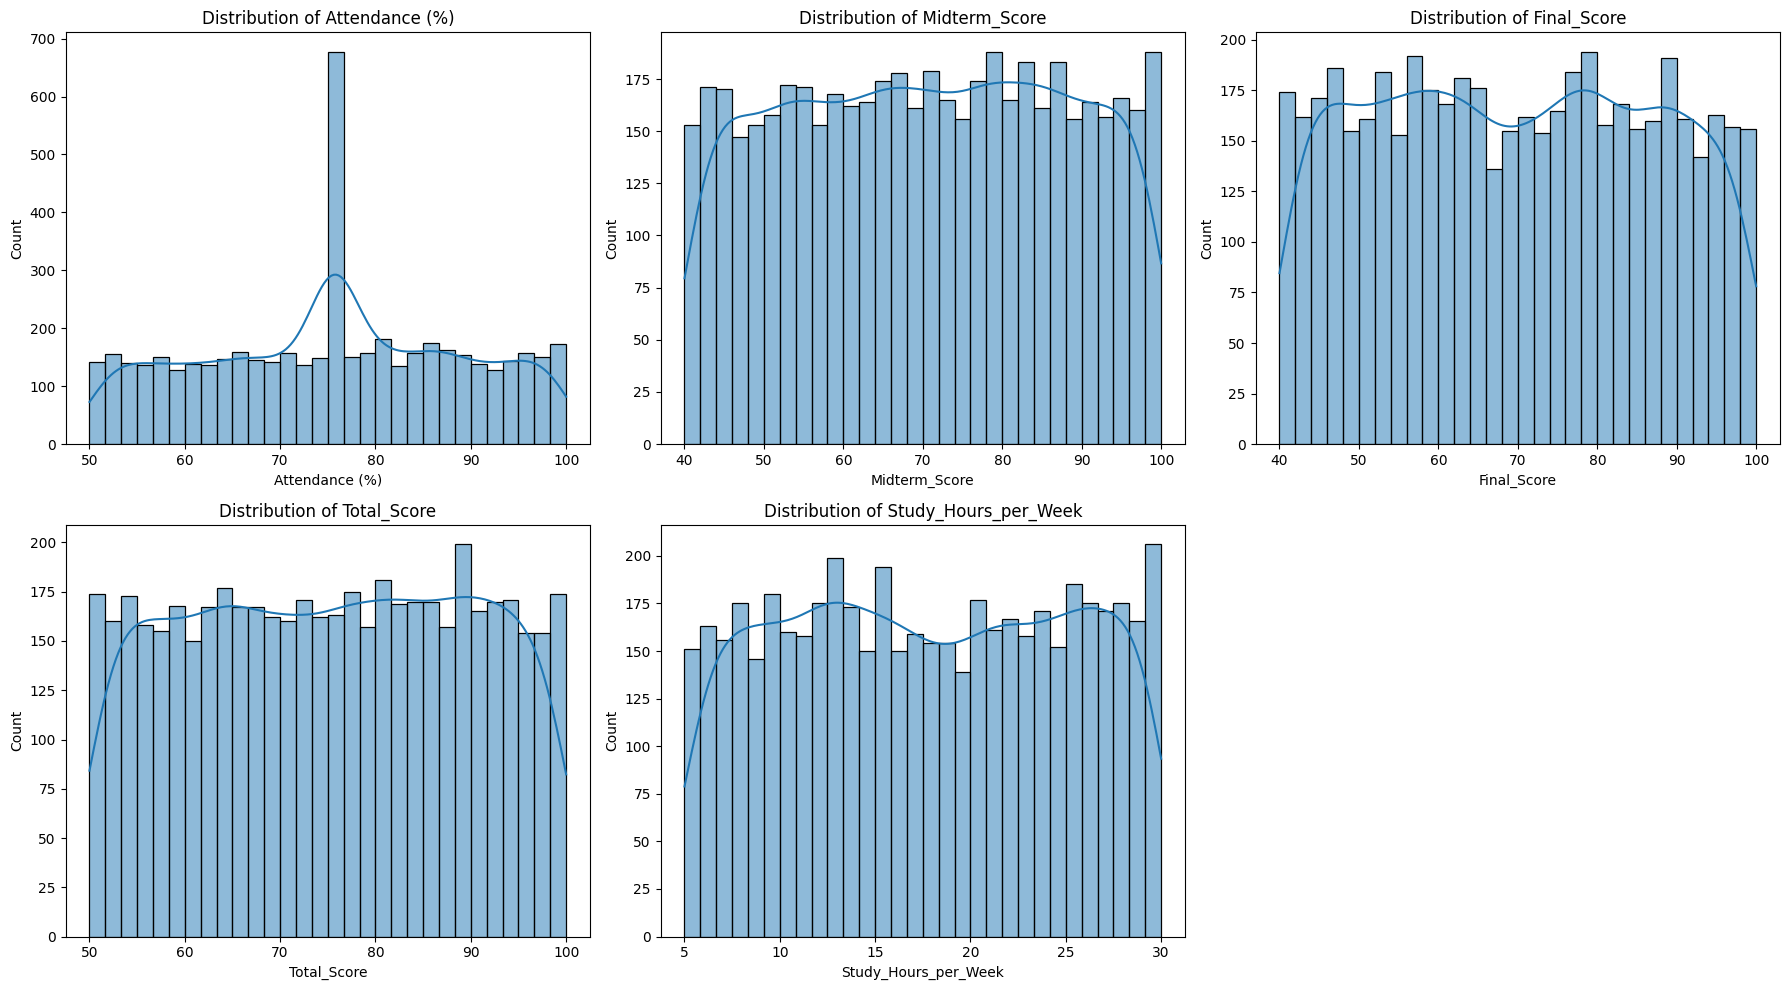

In [11]:
# Distribution of key numerical features
numerical_cols = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score', 'Study_Hours_per_Week']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_clean[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
axes[-1].axis('off')  # Hide extra subplot
plt.tight_layout()
plt.show()

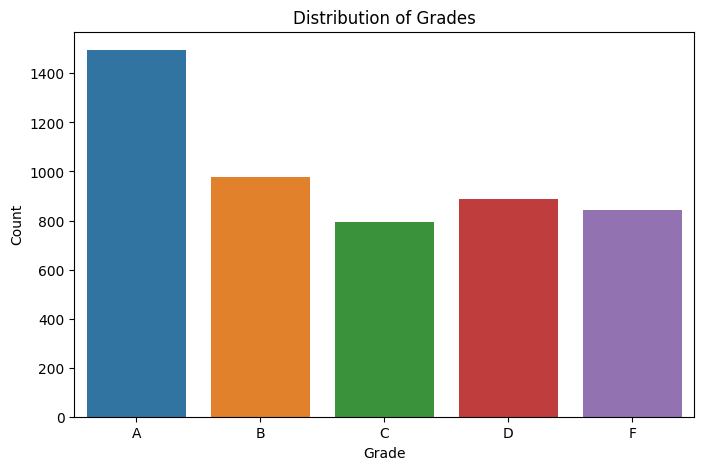

In [12]:
# Grade distribution (target variable)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Grade', order=['A', 'B', 'C', 'D', 'F'])
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

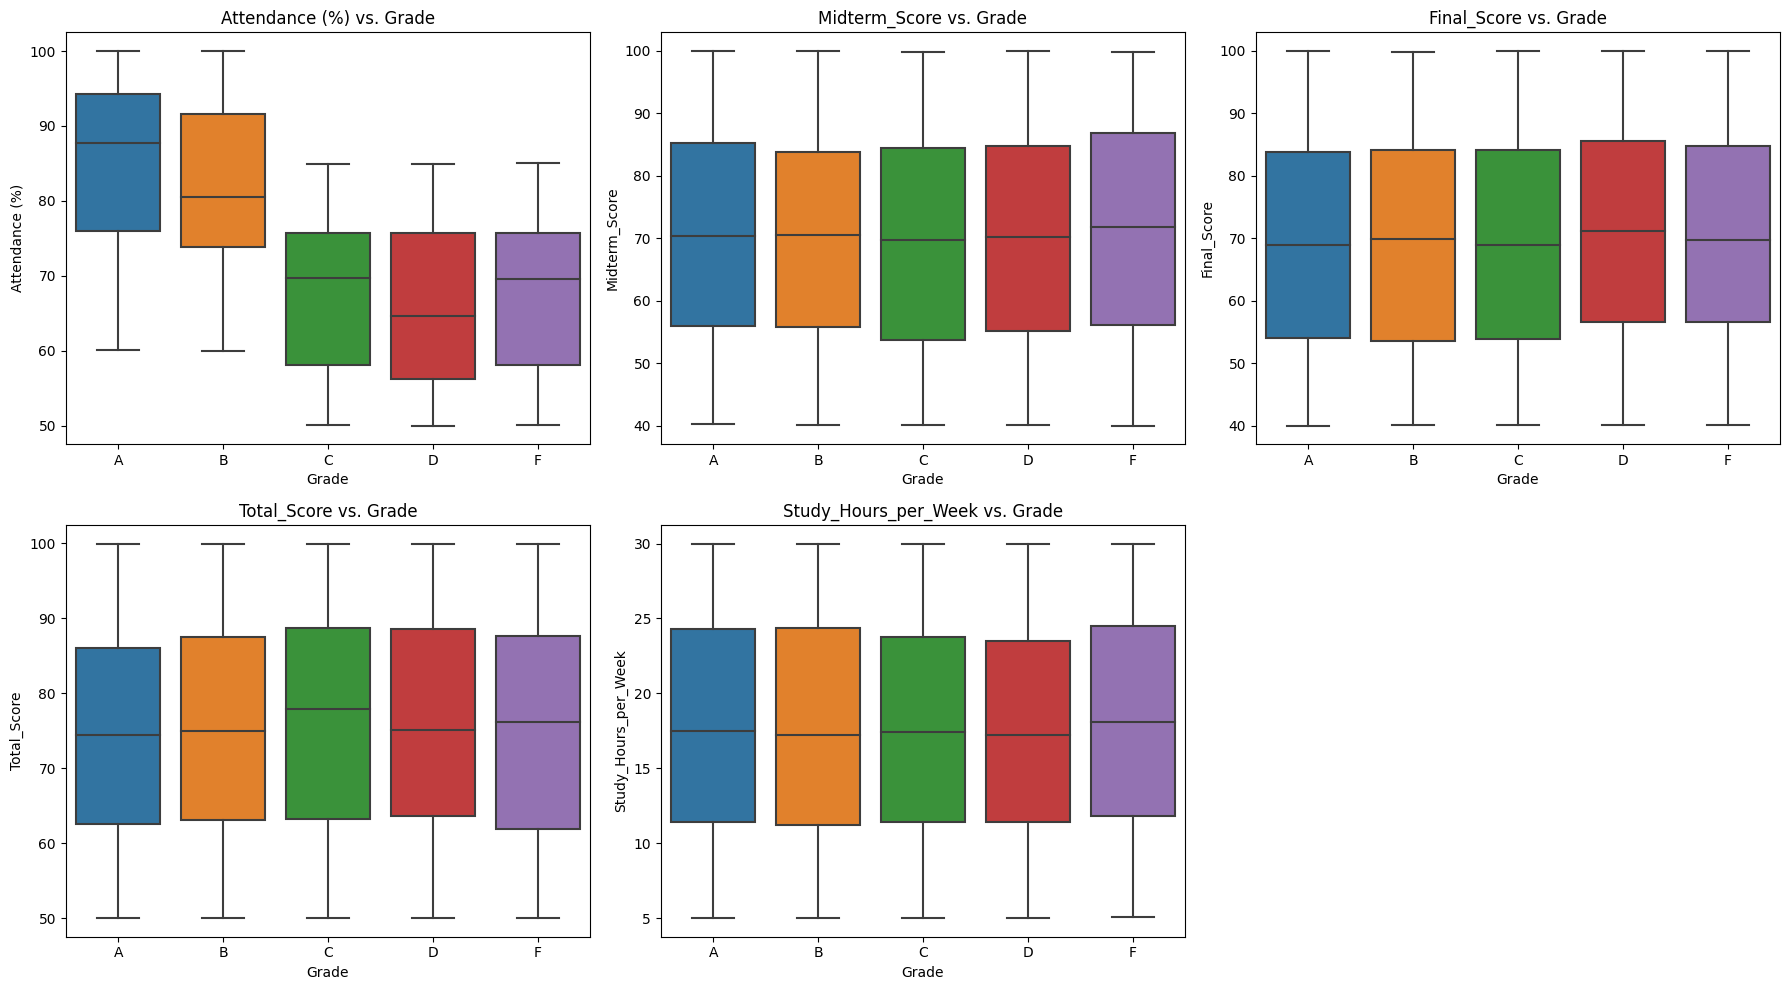

In [13]:
# Box plots of numerical features vs. Grade
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_clean, x='Grade', y=col, order=['A', 'B', 'C', 'D', 'F'], ax=axes[i])
    axes[i].set_title(f'{col} vs. Grade')
axes[-1].axis('off')  # Hide extra subplot
plt.tight_layout()
plt.show()

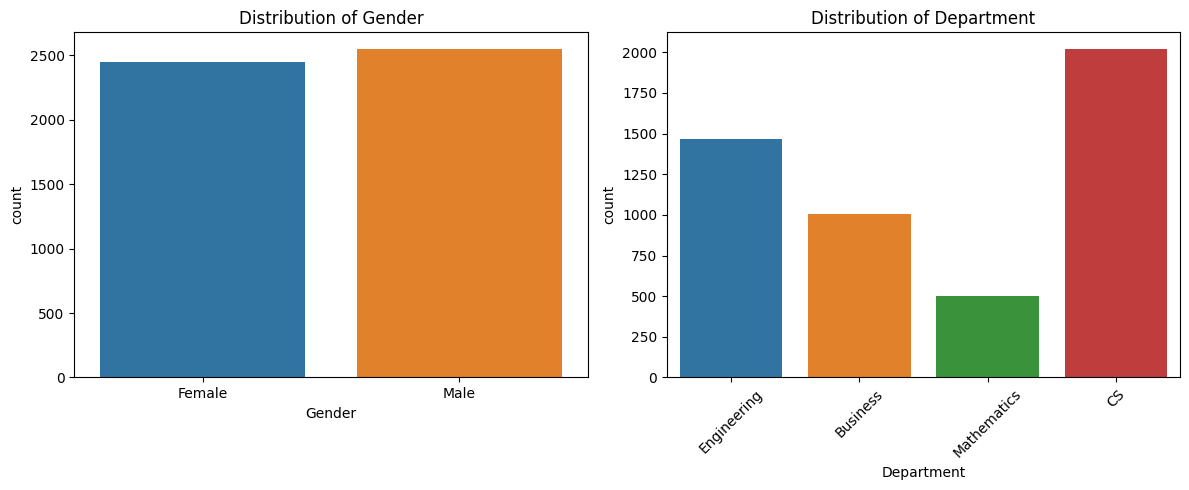

In [14]:
# Categorical feature distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df_clean, x='Gender')
plt.title('Distribution of Gender')
plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='Department')
plt.title('Distribution of Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Results and Analysis**

- **Numerical Featires:** All approximately normal, aligning with df.describe() (e.g., Attendance (%) mean ~75.4, std ~14.4; Total_Score mean ~75.1, std ~14.4). Post-imputation, Attendance (%) (median ~75.73) and others show smooth, bell-shaped curves. Normality suggests balanced variability, though imputation may have tightened Attendance (%)’s spread (10.3% missing filled with median).
- **Grade:** An uneven distribution, with more students earning A’s and B’s, fewer C’s, and moderate D’s and F’s. This indicates some imbalance (e.g., A’s overrepresented, C’s rare), which may affect model performance—worth quantifying with exact counts later. The multi-class target isn’t perfectly balanced, suggesting potential need for class weighting or stratified sampling.
- **Boxplots:**
    - **Attendance (%):** Higher values correlate with better grades (A/B vs. D/F), as expected. A students likely have medians closer to 80–90%, while F’s dip toward 50–60%, reflecting attendance’s role in success.
    - **Midterm_Score, Final_Score, Total_Score, Study_Hours_per_Week:** Surprisingly, box plots show “pretty even positions” across grades (A-F), with medians and spreads similar (e.g., Total_Score median ~75.4 across all).
- **Categorical Feature Distributions:**
    - **Gender:** Fairly even split (M/F), suggesting no gender bias in the sample (~2,500 each, roughly).
    - **Department:** CS (highest), Engineering, Business, Mathematics (lowest). CS dominates, followed by Engineering, with Business and Mathematics less represented.
    - Balanced gender aids generalizability; department skew (CS-heavy) may influence grade patterns if tied to curriculum difficulty.

**Conclusion**
The EDA reveals that Attendance (%) is a clear predictor of Grade, with higher values linked to better grades (A/B), while Total_Score, Midterm_Score, Final_Score, and Study_Hours_per_Week unexpectedly show minimal variation across grades, suggesting data quirks or external grading factors. The Grade distribution is imbalanced (A most common, C least), and categorical features like Department (CS-heavy) offer additional context. These findings guide preprocessing (e.g., encoding Department, scaling features) and modeling (e.g., addressing imbalance), with a need to verify Total_Score’s role. We’ll now preprocess the cleaned data fully for classification.

## Step 5. Final Preprocessing

In this section we will prepare the cleaned dataset for modeling by encoding categorical variables, scaling numerical features, and addressing potential issues (e.g., Total_Score alignment). This ensures all features contribute effectively to predicting Grade. We can achieve this by:

1. Encoding categorical features (Gender, Department, Extracurricular_Activities, Internet_Access_at_Home, Parent_Education_Level, Family_Income_Level) using one-hot encoding.
2. Scaling numerical features with StandardScaler (since they’re approximately normal).
3. Defining Grade as a multi-class target (A=4, B=3, C=2, D=1, F=0).
4. Splitting the data into features (X) and target (y).

In [16]:
# Define target and features
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
y = df_clean['Grade'].map(grade_mapping)
X = df_clean.drop(columns=['Grade'])

In [17]:
# Define numerical and categorical columns
numerical_cols = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 
                  'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 
                  'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home', 
                    'Parent_Education_Level', 'Family_Income_Level']

In [18]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),          # Scale numerical features
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # Encode categorical
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

In [19]:
# Get feature names after encoding
cat_encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(cat_encoded_cols)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Check processed data
print("Processed Features Shape:", X_processed_df.shape)
print("\nProcessed Features Info:")
print(X_processed_df.info())
print("\nFirst 5 Rows:")
print(X_processed_df.head())

Processed Features Shape: (5000, 23)

Processed Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 5000 non-null   float64
 1   Attendance (%)                      5000 non-null   float64
 2   Midterm_Score                       5000 non-null   float64
 3   Final_Score                         5000 non-null   float64
 4   Assignments_Avg                     5000 non-null   float64
 5   Quizzes_Avg                         5000 non-null   float64
 6   Participation_Score                 5000 non-null   float64
 7   Projects_Score                      5000 non-null   float64
 8   Total_Score                         5000 non-null   float64
 9   Study_Hours_per_Week                5000 non-null   float64
 10  Stress_Level (1-10)                 5000 non-

## Step 6. Model Selection, Training and Evaluation

Now comes the moment of truth. We will train, evaluate and compare three models, Random Forest, Logistic Regression and XGBoost. To this we will:

1. Split data into training and testing sets (80/20, stratified).
2. Train three models: Logistic Regression (baseline), Random Forest (ensemble), XGBoost (boosting).
3. Evaluate with accuracy, macro F1-score (for multi-class balance), and confusion matrices.
4. Visualize feature importance and confusion matrices.

In [21]:
# Split data (stratified to preserve grade distribution)
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (4000, 23)
Testing Shape: (1000, 23)


In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


Logistic Regression Results:
              precision    recall  f1-score   support

           F       0.26      0.14      0.18       169
           D       0.33      0.48      0.39       178
           C       0.17      0.06      0.09       159
           B       0.20      0.04      0.06       195
           A       0.44      0.81      0.57       299

    accuracy                           0.37      1000
   macro avg       0.28      0.31      0.26      1000
weighted avg       0.30      0.37      0.30      1000



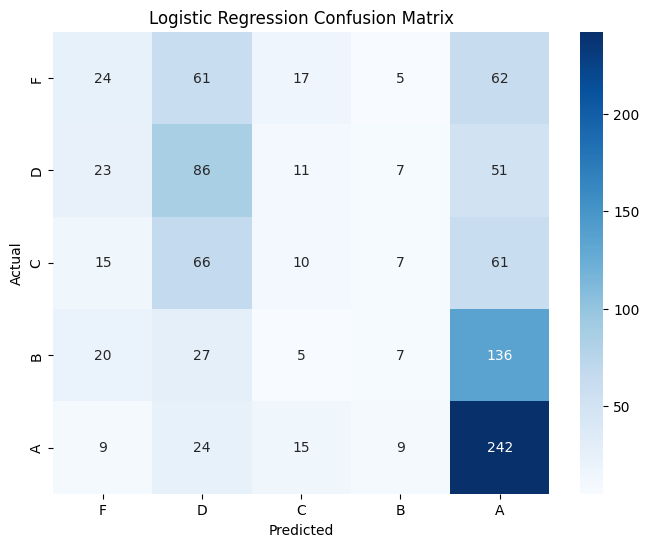


Random Forest Results:
              precision    recall  f1-score   support

           F       0.26      0.30      0.27       169
           D       0.33      0.42      0.37       178
           C       0.18      0.14      0.16       159
           B       0.12      0.06      0.08       195
           A       0.55      0.67      0.60       299

    accuracy                           0.36      1000
   macro avg       0.29      0.32      0.30      1000
weighted avg       0.32      0.36      0.33      1000



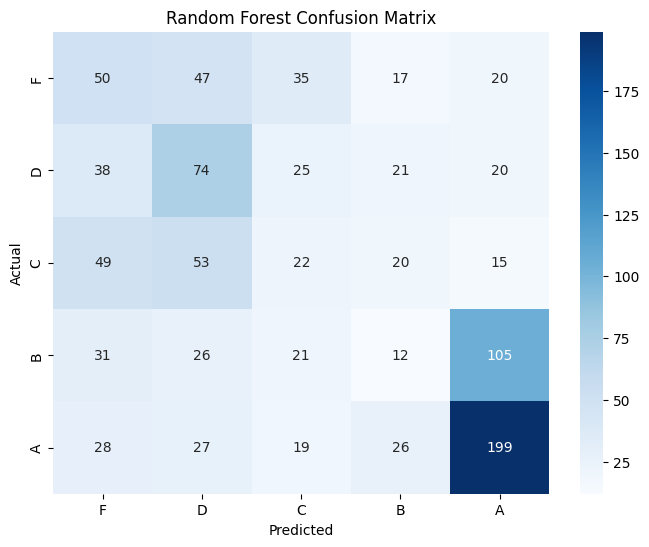


XGBoost Results:
              precision    recall  f1-score   support

           F       0.23      0.24      0.24       169
           D       0.29      0.29      0.29       178
           C       0.18      0.16      0.17       159
           B       0.18      0.14      0.16       195
           A       0.49      0.59      0.54       299

    accuracy                           0.32      1000
   macro avg       0.27      0.28      0.28      1000
weighted avg       0.30      0.32      0.31      1000



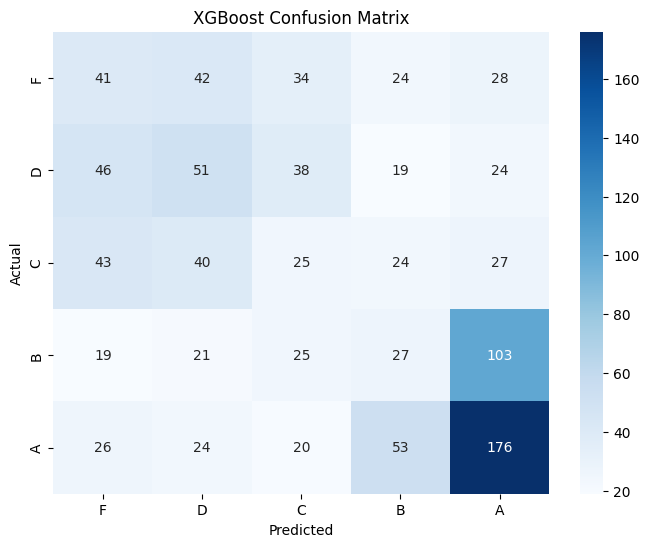

In [23]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred, target_names=['F', 'D', 'C', 'B', 'A']))
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {'y_pred': y_pred, 'cm': cm}

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['F', 'D', 'C', 'B', 'A'], 
                yticklabels=['F', 'D', 'C', 'B', 'A'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

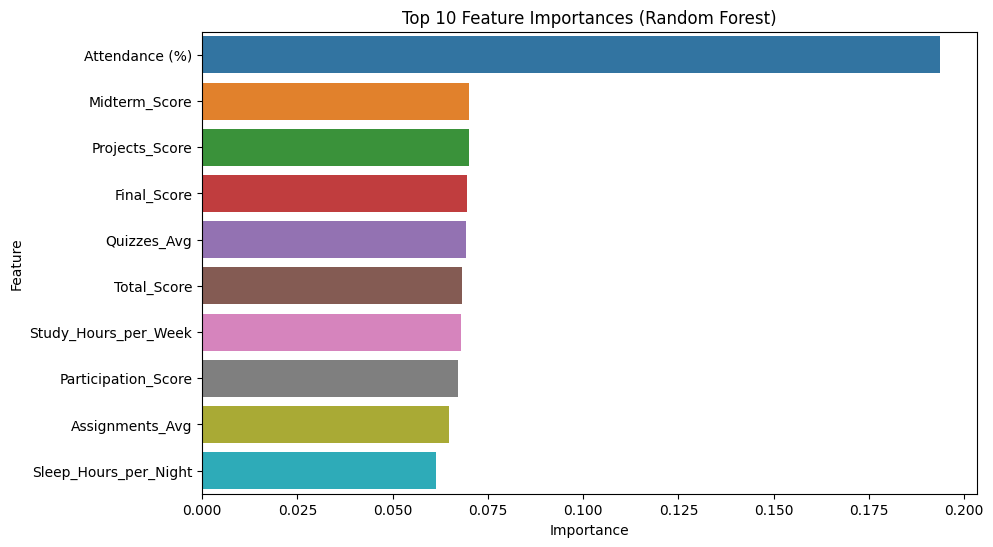

In [24]:
# Feature Importance (Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_processed_df.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

Low performance from the three models (accuracy (32–37%) and macro F1 (0.26–0.30)) are underwhelming, barely above random (20%). This aligns with EDA’s finding: only Attendance (%) strongly correlates with Grade, while Total_Score, Midterm_Score, etc., showed even box plots across grades.